# Graphing examples
## Import isotherms

First import the example data by running the import notebook

In [1]:
%run import.ipynb
import matplotlib.pyplot as plt

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


## Isotherm display

Example of using the Isotherm plotting function.

Material: MCM-41
Adsorbate: nitrogen
Temperature: 77.355K
iso_type: Isotherme
material_batch: Test
Units: 
	Uptake in: mmol/g
	Relative pressure 
Other properties: 
	is_real: True
	lab: MADIREL
	machine: Triflex
	t_act: 150.0
	user: PI



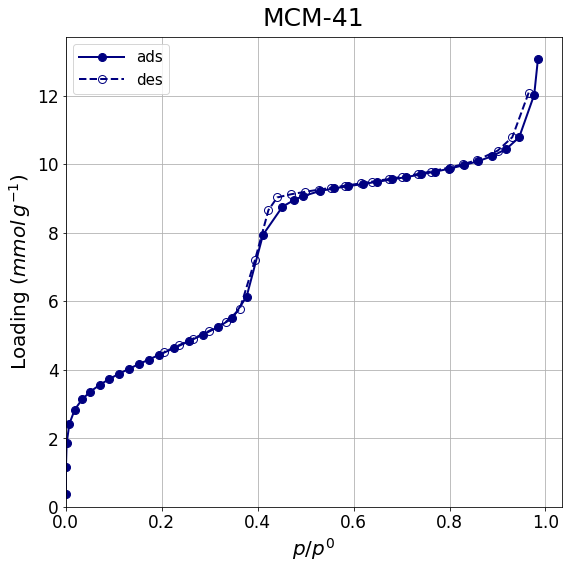

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
isotherm.print_info()

## Isotherm plotting and comparison

Several examples of isotherm plotting are presented here:

- A logarithmic isotherm graph comparing the adsorption branch of two isotherms up to 1 bar.
  The isotherms are measured on the same material and batch, but at different temperatures, 
  so we want this information to be visible in the legend.
  We also want the loading to be displayed in *cm3 STP* and to select the colours manually.

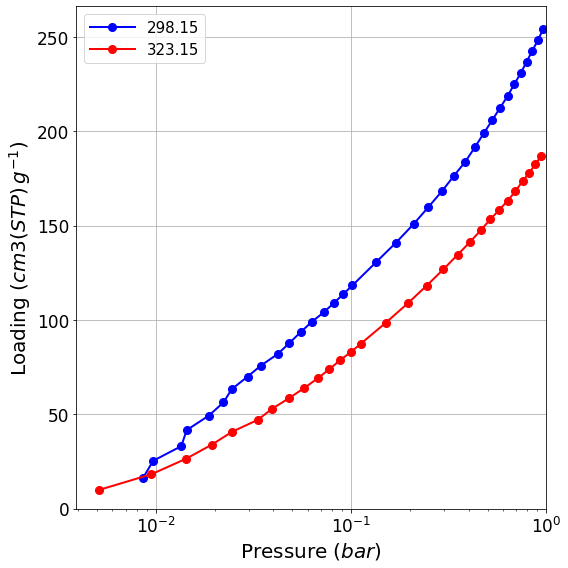

In [3]:
pygaps.plot_iso(
    [isotherms_isosteric[0], isotherms_isosteric[1]],
    branch = 'ads',
    logx = True,
    x_range=(None,1),
    lgd_keys=['temperature'],
    loading_unit='cm3(STP)',
    color=['b', 'r']
)
plt.show()

- A black and white full scale graph of both adsorption and desorption branches of an
  isotherm, saving it to the local directory for a publication. The result file is found [here](novel.png).
  We also display the isotherm points using X markers. 

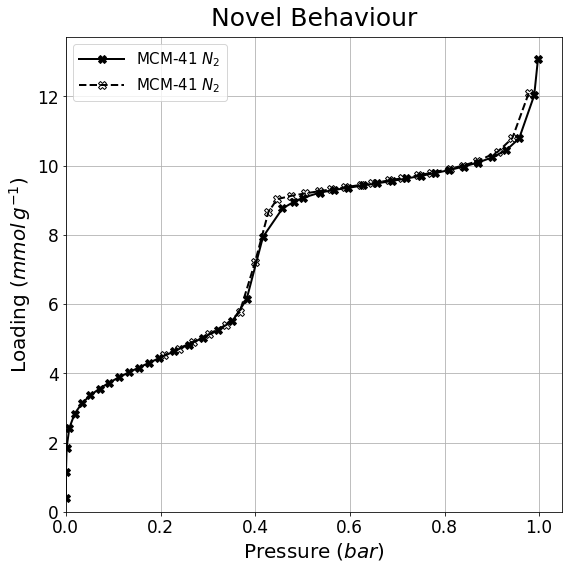

In [4]:
from pathlib import Path

path = Path.cwd() / 'novel'

pygaps.plot_iso(
    isotherm,
    branch = 'all',
    color=False,
    fig_title='Novel Behaviour',
    save_path=path,
    marker=['X']
)

plt.show()

- A graph which plots the both the loading and enthalpy as a function of pressure on the left
  and the enthalpy as a function of loading on the right, for a microcalorimetry experiment.
  We want the legend to appear at the right of the graph and, due to error cumulation,
  to limit the range of enthalpy displayed to 40 kJ. Finally, we want to manually control the 
  size of the pressure and enthalpy markers.

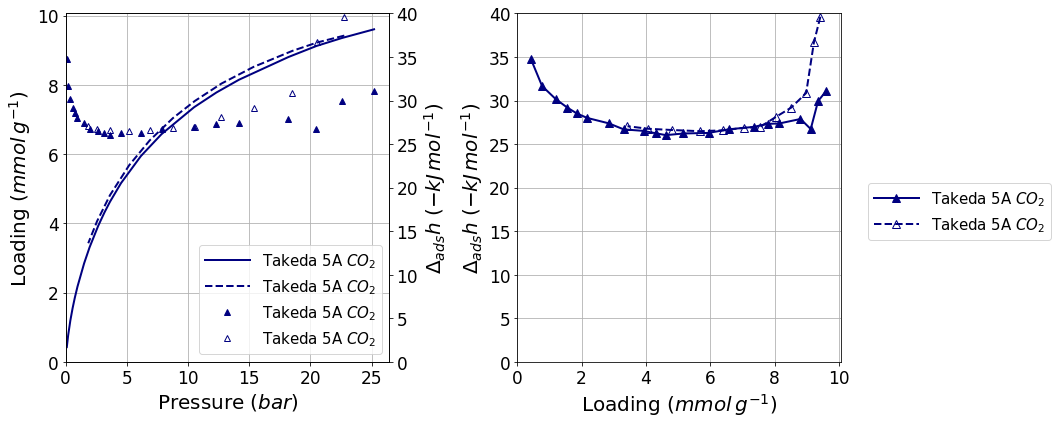

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

pygaps.plot_iso(
    isotherms_calorimetry[1],
    ax=ax1,
    x_data='pressure',
    y1_data='loading',
    y2_data='enthalpy',
    lgd_pos='none',
    y2_range=(0,40),
    y1_line_style=dict(markersize=0),
    y2_line_style=dict(markersize=6)
)
pygaps.plot_iso(
    isotherms_calorimetry[1],
    ax=ax2,
    x_data='loading',
    y1_data='enthalpy',
    y1_range=(0,40),
    lgd_pos='right',
    marker=['^'],
    y2_line_style=dict(markersize=6)
)
plt.show()

- A comparison graph of all the nitrogen isotherms, with both branches shown but without adding the desorption branch to the label. We want each isotherm to use a different marker and to not display the desorption branch in the legend.

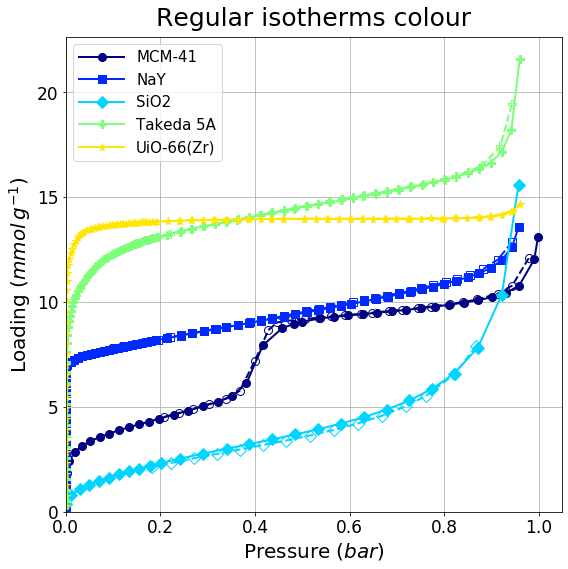

In [6]:
pygaps.plot_iso(
    isotherms_n2_77k, 
    branch='all-nol',
    fig_title="Regular isotherms colour", 
    lgd_keys=['material'],
    marker=5
)
plt.show()

- A black and white version of the same graph, but with the pressure being in relative mode.

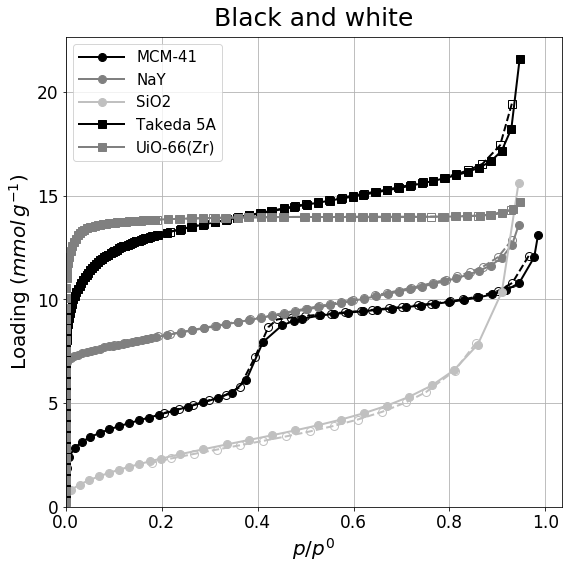

In [7]:
pygaps.plot_iso(
    isotherms_n2_77k, 
    branch='all-nol',
    color=False,
    fig_title="Black and white", 
    lgd_keys=['material'],
    pressure_mode='relative'
   )
plt.show()

- Only some ranges selected for display from all the isotherms.

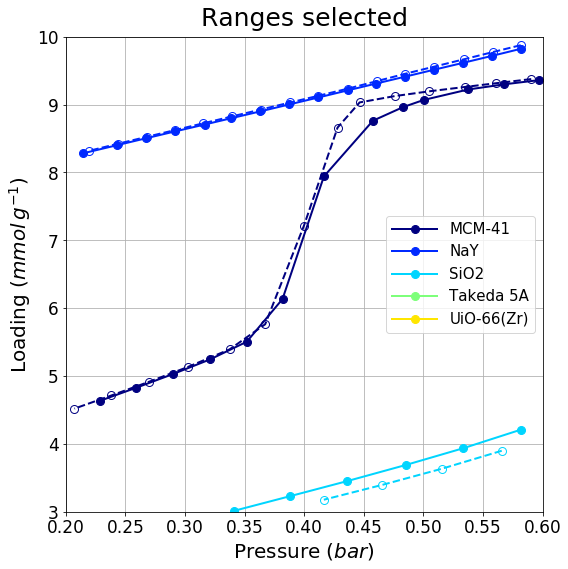

In [8]:
pygaps.plot_iso(
    isotherms_n2_77k, 
    branch='all-nol',
    x_range=(0.2, 0.6), 
    y1_range=(3, 10), 
    fig_title="Ranges selected", 
    lgd_keys=['material']
)
plt.show()

- The isosteric pressure isotherms, in relative pressure mode and displayed in cm3 STP. No markers 
  are displayed and the colour range is divided into 3 colours.

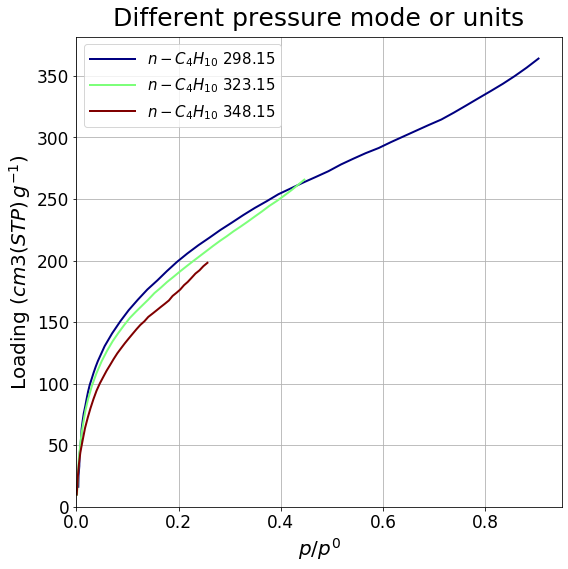

In [9]:
pygaps.plot_iso(
    isotherms_isosteric, 
    branch='ads',
    pressure_mode='relative', 
    loading_unit='cm3(STP)',
    fig_title="Different pressure mode or units", 
    lgd_keys=['adsorbate', 'temperature'],
    color=3,
    marker=False
)
plt.show()

- Only desorption branch of some isotherms, displaying the user who recorded the isotherms
  in the graph legend.

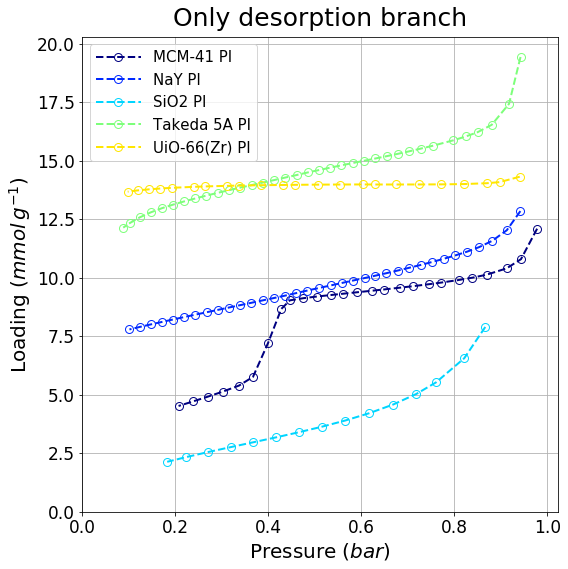

In [10]:
pygaps.plot_iso(
    isotherms_n2_77k,
    branch='des',
    fig_title="Only desorption branch", 
    lgd_keys=['material', 'user']
)
plt.show()